In [3]:
import pandas as pd
import numpy as np

Reading the data

In [4]:
advertising = pd.read_csv('D:/upgrad/ML/advertising.csv')

In [5]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Visualising the data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

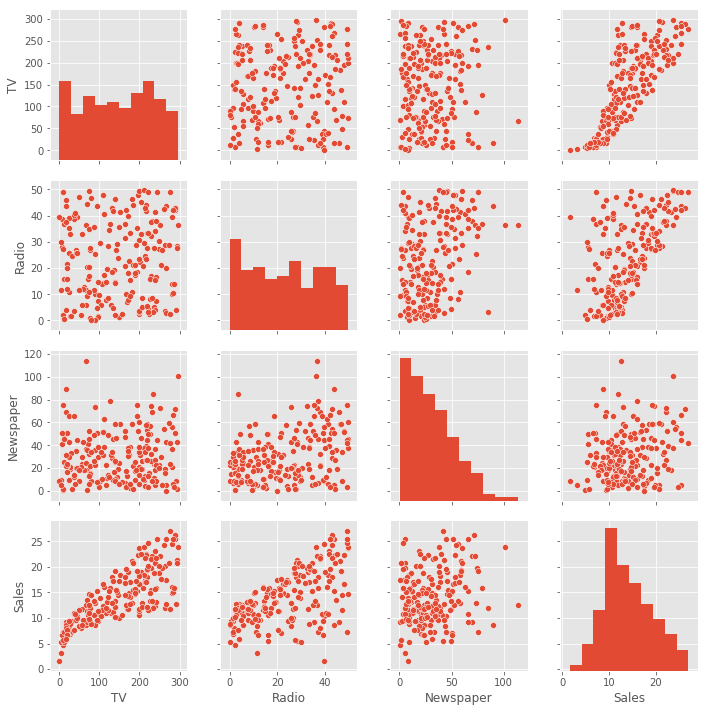

In [9]:
sns.pairplot(advertising)

Split the dataset between training and test

In [10]:
X = advertising[['TV','Radio','Newspaper']]
y=advertising['Sales']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Perform Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
lr.coef_

array([0.0454256 , 0.18975773, 0.00460308])

In [17]:
lr.intercept_

2.6527896688794943

Predictions

In [23]:
y_pred = lr.predict(X_test)

Calculate the error terms

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)
print(mse)
print(r2s)           

1.8506819941636972
0.9058622107532245


Checking P value using statsmodels

In [26]:
import statsmodels.api as sm

X_train_sm = X_train

X_train_sm = sm.add_constant(X_train)

smlr = sm.OLS(y_train,X_train_sm).fit()

In [28]:
smlr.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [30]:
smlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           9.97e-66
Time:                        15:17:10   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.000       1.893       3.412
TV             0.0454      0.002     27.093      0.000       0.042       0.049
Radio          0.1898      0.011     17.009      0.000       0.168       0.212
Newspaper      0.0046      0.008      0.613      0.541      -0.010       0.019
==============================================================================
Omnibus:                       40.095   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.622
Skew:                          -1.233   Prob(JB):                     6.94e-19
Kurtosis:                       5.873   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation

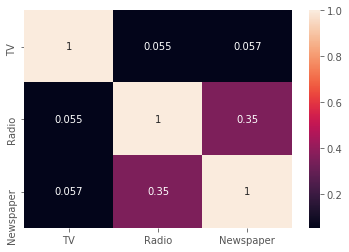

In [32]:
sns.heatmap(X.corr(), annot=True)

Remove the Newspaper and run the model once again

In [33]:
X = advertising[['TV','Radio','Newspaper']]

y= advertising['Sales']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [35]:
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]

In [36]:
lsr = LinearRegression()

lsr.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
y_pred_new = lsr.predict(X_test_new)

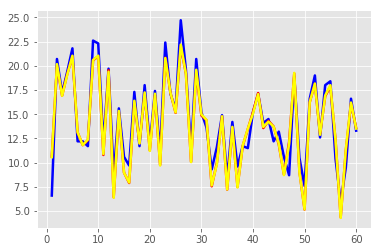

In [46]:
c = [ i for i in range(1,61,1)]

fig = plt.figure()
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred, color='red', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_new, color='yellow', linewidth=2.5, linestyle='-')

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_new)
r2s = r2_score(y_test, y_pred_new)
print(mse)
print(r2s)

1.784740052090281
0.909216449171822


In [50]:
X_train_final = X_train_new
X_train_final = sm.add_constant(X_train_final)
slr_final = sm.OLS(y_train, X_train_final).fit()

In [51]:
slr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           4.46e-67
Time:                        16:26:39   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.000       1.992       3.446
TV             0.0455      0.002     27.368      0.000       0.042       0.049
Radio          0.1925      0.010     18.860      0.000       0.172       0.213
==============================================================================
Omnibus:                       41.530   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.544
Skew:                          -1.255   Prob(JB):                     2.18e-20
Kurtosis:                       6.037   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""